# Working with Images

Link to module: <https://scikit-image.org/>

In [64]:
%matplotlib inline
from skimage import data, io, filters
import numpy as np
import glob
# Source: https://scikit-image.org/

In [65]:
glob.os.chdir('/Users/andrespatrignani//Dropbox/Teaching/Scientific programming/introcoding-spring-2019/Datasets/')

img_files = []
for file in glob.glob("*.jpg"):
    img_files.append(file)
    print(file)


wheat.jpg


In [66]:
rgb = io.imread(img_files[0])

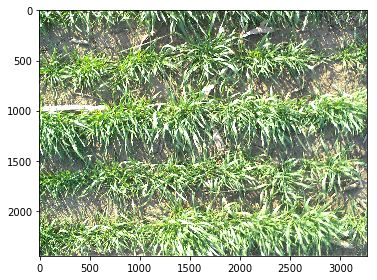

In [67]:
io.imshow(rgb)


In [13]:
rgb.shape

(2448, 3264, 3)

In [22]:
red = rgb[:,:,0]
green = rgb[:,:,1]
blue = rgb[:,:,2]

In [25]:
red.shape
red.dtype

dtype('uint8')

In [27]:
red = np.array(rgb[:,:,0], dtype='float')
green = np.array(rgb[:,:,1], dtype='float')
blue = np.array(rgb[:,:,2], dtype='float')

In [28]:
red.dtype

dtype('float64')

In [38]:
red_green = np.divide(red,green)
blue_green = np.divide(blue,green)
excess_green = 2*green - red - blue

print(type(red_green))

<class 'numpy.ndarray'>


In [60]:
bw = np.logical_and(red_green < 0.95, blue_green < 0.95, excess_green > 20)


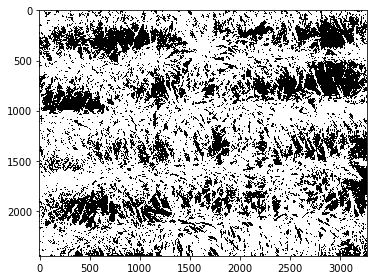

In [61]:
io.imshow(bw)

wheat.jpg
66.64


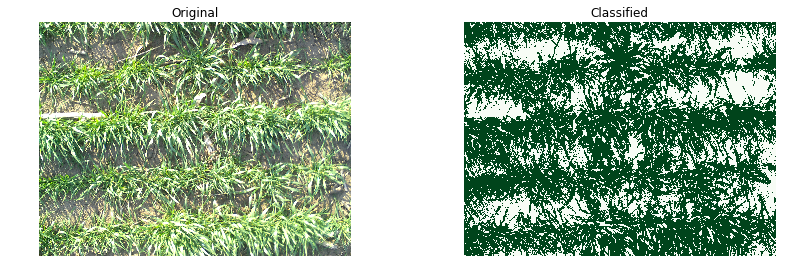

In [75]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

np.seterr(divide='ignore', invalid='ignore')

glob.os.chdir('/Users/andrespatrignani//Dropbox/Teaching/Scientific programming/introcoding-spring-2019/Datasets/')

img_files = []
for file in glob.glob("*.jpg"):
    img_files.append(file)
    print(file)
    
#Read image
original_img = mpimg.imread(img_files[0])
#original_img = plt.imread(img_files[0])

#Convert data to single precision floating (m x n x 3 array) (you can convert it to double if you want, but each value has only 3 digits).
original_single = np.single(original_img)

#Extract data in separate variable for easier manipulation.
red = original_single[:, :, 0] #Extract matrix of red pixel values into a separate array (so it is easier to manipulate them from now on, m x n array)
green = original_single[:, :, 1] #Extract matrix of green pixel values into a separate array (m x n).
blue = original_single[:, :, 2] #Extract matrix of blue pixel values into a separate array (m x n).

red_green = np.divide(red, green) #Calculate red to green ratio for each pixel. The result is an m x n array.
blue_green = np.divide(blue, green) #Calculate blue to green ratio for each pixel. The result is an m x n array.
classified_img = np.logical_and(red_green < 0.95, blue_green < 0.95, green > 10) #Classification of green pixels
#See that we started with an m x n x 3 (original image) and we finished with and m x n x 2 (binary or classified image)

percent_cc = np.float(np.sum(classified_img)) / np.float(np.size(classified_img)) * 100 #Calculate percent canopy cover

print(round(percent_cc,2))

#Create subplots containing the original and binary images
fig = plt.figure(figsize=(12,4))
left_img = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(original_img)
left_img.set_title('Original')
left_img.axis('off')

right_img = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(classified_img, cmap='Greens')
right_img.set_title('Classified')
right_img.axis('off')
fig.tight_layout()